# ML: Unsupervised algorithm - Isolation Forest - Bank Fraud

## Introduction

Let's work on an example of banking fraud using the dataset that can be downloaded from KAGGLE (https://www.kaggle.com/datasets/uciml/german-credit), which contains data on customers who have applied for a loan from the bank. 

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

## 2. Load datasets

In [2]:
df = pd.read_csv('german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


The list of variables included in the file is:

* Age: is a numeric variable.
* Sex: is a text string with values: male, female.
* Job: numeric variable of categorical type that takes the following values:
    * 0 - unskilled and non-resident.
    * 1 - unskilled and resident.
    * 2 - skilled.
    * 3 - highly skilled.
 
* Housing: text variable which can be own, rent, or free.
* Saving accounts: text variable with possible values: little, moderate, quite rich, rich.
* Checking account: numeric variable in DM (Deutsch Mark).
* Credit amount: numeric variable in DM.
* Duration: numeric variable reflecting the number of months of the duration of the loan.
* Purpose: text variable which can take one of the following values: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others.

## 3. Dataset cleaning, wrangling and analysis

Analyse the dataset to see if there are unique, duplicate, missings or outliers and take action. 

The first thing we notice with the info command is that there is a variable 'Unnamed: 0' that we are going to delete. 
Get the number of unique values for each variable with the unique command.
To analyse the duplicates we use duplicated.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [4]:
df.nunique().sort_values()

Sex                    2
Housing                3
Checking account       3
Job                    4
Saving accounts        4
Purpose                8
Duration              33
Age                   53
Credit amount        921
Unnamed: 0          1000
dtype: int64

In [5]:
df.duplicated().sum()

0

Separate the categorical and numerical variables to do a detailed analysis of them to see the number of nulls and the different values they take:

* Make the selection with select_dtypes and the exclude option. Don't forget to create the copy of the dataframe.
* Obtain the number of nulls with isna and the sum by columns with the sum command. To facilitate the analysis we use the sort_values command.
* Obtain a count of the values taken by some variables such as 'Saving accounts' and 'Checking accounts' with value_counts.  
* Avoid distorting the results we use the dropna option.
* Let's fill in the missings of these variables with 'little' and 'unknown' as they are the most frequent ones.

In [6]:
cat = df.select_dtypes(exclude = 'number').copy()

In [7]:
cat.isna().sum().sort_values(ascending = False)

Checking account    394
Saving accounts     183
Sex                   0
Housing               0
Purpose               0
dtype: int64

In [8]:
df['Saving accounts'].value_counts(dropna=False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [9]:
df['Checking account'].value_counts(dropna=False)

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [10]:
# For Saving accounts we replace the NA with the value 'little' which is by far the most frequent value.
df['Saving_accounts'] = df['Saving accounts'].fillna('little')

# For Checking account 40% of data are NaN and the two most frequent values have very similar values, 
# so we create a new category 'unknown'. We could randomise on 'little' or 'moderate'. moderate
df['Checking_account'] = df['Checking account'].fillna('desconocido')
df


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Saving_accounts,Checking_account
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,little,little
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,little,moderate
2,2,49,male,1,own,little,NaN,2096,12,education,little,desconocido
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,little,little
4,4,53,male,2,free,little,little,4870,24,car,little,little
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,little,desconocido
996,996,40,male,3,own,little,little,3857,30,car,little,little
997,997,38,male,2,own,little,NaN,804,12,radio/TV,little,desconocido
998,998,23,male,2,free,little,little,1845,45,radio/TV,little,little


In [11]:
df['Checking_account'].value_counts(normalize=True)

desconocido    0.394
little         0.274
moderate       0.269
rich           0.063
Name: Checking_account, dtype: float64

To be able to use the variables in the model we have to encode those that are categorical, as the model does not understand variables that do not have a numerical format. We do this with the sklearn LabelEncoder method and change the name so as not to replace the original variables and to be able to maintain traceability of the data.

In [12]:
cat.columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [13]:
# Categorise the variables in order to use them in the model.
categorical = ['Sex', 'Housing', 'Saving_accounts', 'Checking_account', 'Purpose']

encoder = LabelEncoder()
for label in categorical:
    label1 = label + '_enc'
    print(label1)
    df[label1] = encoder.fit_transform(df[label])

Sex_enc
Housing_enc
Saving_accounts_enc
Checking_account_enc
Purpose_enc


Standardise the numerical variables to remove the influence of magnitude with StandardScaler. Include the variables that coded the values of the categorical variables for consistency.

In [14]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose',
       'Saving_accounts', 'Checking_account', 'Sex_enc', 'Housing_enc',
       'Saving_accounts_enc', 'Checking_account_enc', 'Purpose_enc'],
      dtype='object')

In [15]:
# Select the numerical and categorised variables

df = df.select_dtypes(include='number')
df.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_enc,Housing_enc,Saving_accounts_enc,Checking_account_enc,Purpose_enc
0,0,67,2,1169,6,1,1,0,1,5
1,1,22,2,5951,48,0,1,0,2,5
2,2,49,1,2096,12,1,1,0,0,3
3,3,45,2,7882,42,1,0,0,1,4
4,4,53,2,4870,24,1,0,0,1,1


In [16]:
df = df.loc[:,['Age','Job','Credit amount','Duration','Sex_enc', 'Housing_enc', 'Saving_accounts_enc',
               'Checking_account_enc', 'Purpose_enc']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(X_scaled, columns=df.columns)
data_scaled.head()

,Age,Job,Credit amount,Duration,Sex_enc,Housing_enc,Saving_accounts_enc,Checking_account_enc,Purpose_enc
0,2.766456,0.146949,-0.745131,-1.236478,0.670280,-0.133710,-0.463409,-0.001045,1.073263
1,-1.191404,0.146949,0.949817,2.248194,-1.491914,-0.133710,-0.463409,1.044372,1.073263
2,1.183312,-1.383771,-0.416562,-0.738668,0.670280,-0.133710,-0.463409,-1.046463,0.061705
3,0.831502,0.146949,1.634247,1.750384,0.670280,-2.016956,-0.463409,-0.001045,0.567484
4,1.535122,0.146949,0.566664,0.256953,0.670280,-2.016956,-0.463409,-0.001045,-0.949853


We are going to obtain a Principal Component Analysis (PCA) to be able to paint the first two components and thus see in a scatterplot the maximum possible information, since each component agglutinates a group of variables.

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1000, 2)

In [18]:
X_pca

array([[-0.54760083,  2.52984256],
       [ 1.17341002, -2.47086958],
       [-0.71645631,  1.67667933],
       ...,
       [-0.77358701,  0.9741025 ],
       [ 1.3512007 ,  0.01564918],
       [ 1.60792046, -0.89476066]])

## 4. Train model

It is time to model and instantiate sklearn's Isolation Forest model whose most important parameters are:

* n_estimators: the number of trees in the forest. The default is 100.
* max_samples: for each tree, the number or proportion of samples. Default is 'auto', calculated by the algorithm.
* contamination: this is the most critical parameter, the user sets the proportion of abnormal points in the sample. Default is 'auto', it is determined by the algorithm.
* max_features: for each tree, the number or proportion of features.

The most important methods are:

* fit(): method for training the model.
* predict(): returns two values: 1 if the observation is normal or -1 if the algorithm considers it atypical.
* decision_function(): returns the outlier score of the sample. The lower the value, the more likely it is an abnormal sample. It is related to the contamination parameter, if not included in the model instance, decision_function will subtract 0.5, interpreting normal values as positive 0 and abnormal values as negative. 
If the values are around 0.5 the model is not quite sure if the sample is outlier or not. You can check the details here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest.decision_function

To visualise the results we will use the first two components of the PCA for the x and y axes, and assign the colour of the samples according to the model label. Note that the outliers are located at the outer points. Also, note that this is a two-dimensional representation of a data set with many dimensions.

In [19]:
IsoFrst = IsolationForest (n_estimators=100,contamination=0.15)
IsoFrst.fit(X_scaled)
outliers = IsoFrst.predict(X_scaled)
anomaly_score = IsoFrst.decision_function(X_scaled)

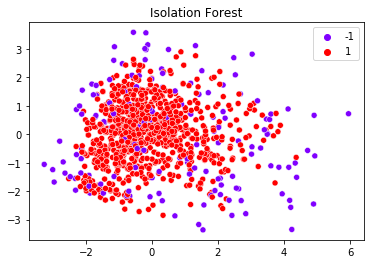

In [20]:
plt.title('Isolation Forest')
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=outliers, palette='rainbow');
#Resultado del código ejecutado:

In [22]:
df['outlier']=outliers

In [28]:
df[df['outlier']==-1]

,Age,Job,Credit amount,Duration,Sex_enc,Housing_enc,Saving_accounts_enc,Checking_account_enc,Purpose_enc,outlier
5,35,1,9055,36,1,0,0,0,3,-1
8,61,1,3059,12,1,1,3,0,5,-1
11,24,2,4308,48,0,2,0,1,0,-1
18,44,3,12579,24,0,0,0,2,1,-1
21,44,2,2647,6,1,2,2,1,5,-1
...,...,...,...,...,...,...,...,...,...,...
972,29,0,1193,24,0,2,0,1,1,-1
973,36,2,7297,60,1,2,0,1,0,-1
975,57,1,1258,24,0,1,2,3,5,-1
981,33,3,4844,48,1,2,0,0,0,-1


In [31]:
df['outlier'].value_counts()

 1    850
-1    150
Name: outlier, dtype: int64

Include the outliers in the dataset and the value of decision_function. We see that 31% of the values are considered outliers, which is excessive. Analyse the anomaly score and see that the most outliers appear with a value below -0.05 approximately.

In [32]:
df['cluster_isoForest'] = outliers
df['anomaly_score'] = anomaly_score

In [33]:
df['cluster_isoForest'].value_counts()

 1    850
-1    150
Name: cluster_isoForest, dtype: int64

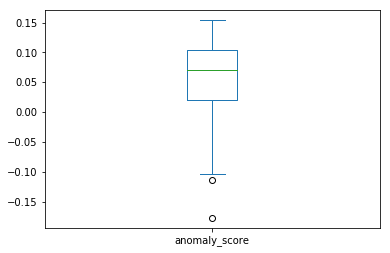

In [34]:
df['anomaly_score'].plot(kind='box');

In [35]:
df.sample(10)

,Age,Job,Credit amount,Duration,Sex_enc,Housing_enc,Saving_accounts_enc,Checking_account_enc,Purpose_enc,outlier,cluster_isoForest,anomaly_score
326,49,2,5801,12,1,2,0,0,4,1,1,0.037843
162,36,2,1262,15,1,1,2,0,2,1,1,0.080944
176,42,2,2577,12,1,1,0,1,4,1,1,0.135369
584,52,3,2133,12,0,0,0,0,1,-1,-1,-0.015858
728,59,2,6416,48,0,2,0,2,0,-1,-1,-0.076040
624,65,2,2600,18,1,0,0,1,5,1,1,0.007762
963,35,2,2397,24,1,1,2,0,5,1,1,0.089930
444,30,3,5096,48,0,1,0,2,4,1,1,0.010820
140,27,0,709,6,1,1,3,3,1,-1,-1,-0.068943
493,38,2,368,6,1,1,0,2,5,1,1,0.103406


To calculate the cut-off value, we will calculate the minimum of its confidence interval, CI, and consider values below this value as outliers to see how the number changes.

In [36]:
out_mean = float(df['anomaly_score'].mean())
print('outliers mean: ',out_mean)
out_std = float(df['anomaly_score'].std())
print('outliers std: ',out_std)
out_min = float(out_mean - out_std)
print('outliers min: ',out_min)

outliers mean:  0.06054256880899734
outliers std:  0.055665377112936947
outliers min:  0.004877191696060393


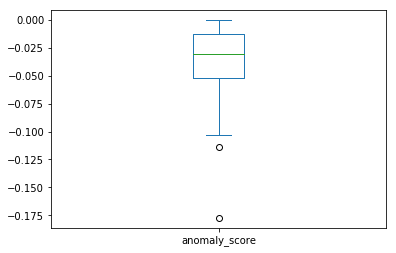

In [37]:
df.loc[df['cluster_isoForest'] == -1,['anomaly_score']].plot(kind='box')

Create a new variable in the dataset where we store the new value -1, which corresponds to 16.7% of the observations. We plot again to place the anomalies in the point cloud.

__Please note__: in this type of model it is always necessary to evaluate with the clients the rate of abnormal registrations they are expecting.

In [39]:
df['cluster_isoForest_end'] = np.where(df['anomaly_score'] < out_min,-1,1)

In [40]:
df['cluster_isoForest_end'].value_counts()

 1    832
-1    168
Name: cluster_isoForest_end, dtype: int64

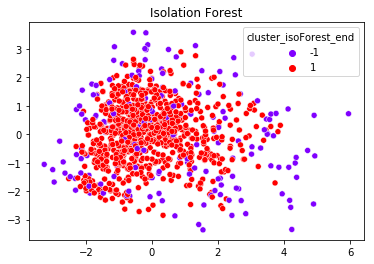

In [41]:
plt.title('Isolation Forest')
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=df['cluster_isoForest_end'], palette='rainbow');